In [1]:
def de_moneyize(money):
    number = money.replace(',','')
    number = number.strip('$')
    return float(number)

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import copy

conn = sqlite3.connect('../data/movies.db')

df_bom_movie_gross = pd.read_sql('''
select *
from bom_movie_gross
''', conn)

df_check = copy.copy(df_bom_movie_gross.dropna())

df_check['foreign_gross'] = df_check['foreign_gross'].map(de_moneyize)

count    2.007000e+03
mean     7.579038e+07
std      1.381796e+08
min      6.000000e+02
25%      3.900000e+06
50%      1.940000e+07
75%      7.595000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

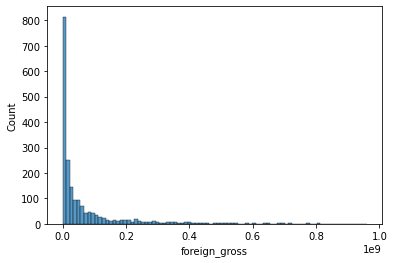

In [3]:
display(df_check['foreign_gross'].describe())
sns.histplot(data = df_check['foreign_gross']);

count    3.387000e+03
mean     4.502979e+07
std      1.126843e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+06
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

<AxesSubplot:xlabel='foreign_gross', ylabel='Count'>

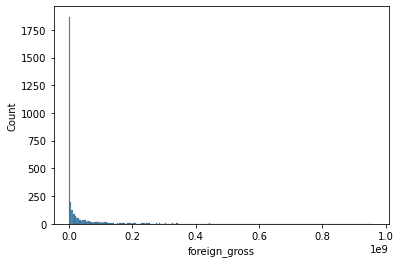

In [4]:
df_bom_movie_gross['foreign_gross'].fillna('0', inplace = True)
df_bom_movie_gross['foreign_gross'] = df_bom_movie_gross['foreign_gross'].map(de_moneyize)
display(df_bom_movie_gross['foreign_gross'].describe())
sns.histplot(data = df_bom_movie_gross['foreign_gross'])

In [5]:
df_bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idx             3387 non-null   int64  
 1   title           3387 non-null   object 
 2   studio          3382 non-null   object 
 3   domestic_gross  3359 non-null   float64
 4   foreign_gross   3387 non-null   float64
 5   year            3387 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 158.9+ KB


In [6]:
df_bom_movie_gross.dropna(inplace = True)
df_bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idx             3356 non-null   int64  
 1   title           3356 non-null   object 
 2   studio          3356 non-null   object 
 3   domestic_gross  3356 non-null   float64
 4   foreign_gross   3356 non-null   float64
 5   year            3356 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 183.5+ KB


In [7]:
df_bom_movie_gross['worldwide_gross'] = df_bom_movie_gross['domestic_gross'] + df_bom_movie_gross['foreign_gross']

In [8]:
df_bom_movie_gross.head()

,idx,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [9]:
df_bom_movie_gross.to_csv(path_or_buf='../data/cln_bom_movie_gross.csv')